In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os import listdir
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
import math
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import gzip
import io

# Homework 4

### Question 1: Bag of Words

In [2]:
#1a (I dropped pubmed and nytimes due to its large file size)
bag_o_words = []
vocab_docs = ['pass','enron','kos','nips']
for ix, file in enumerate(listdir('bag_of_words/zipped_docs')):
    if file != '.ipynb_checkpoints':
        with gzip.open(f'bag_of_words/zipped_docs/{file}', 'rt') as f1:
            doc = f1.read()
            data = io.StringIO(doc)
            df = pd.read_csv(data, sep=" ", names = ['document_id','word_id','count'])
            updated_ids = [str(id_) + vocab_docs[ix] for id_ in df['document_id']]
            df['document_id'] = updated_ids
        with open(f'bag_of_words/vocab/vocab.{vocab_docs[ix]}.txt') as f2:
            vocab = f2.read()
            vocab_data = io.StringIO(vocab)
            vocab_df = pd.read_csv(vocab_data, sep=" ", names = ['word_text']).reset_index()
        corpus = df.merge(vocab_df, how = 'inner', left_on = 'word_id', right_on = 'index')
        bag_o_words.append(corpus)

common_corpus = pd.concat(bag_o_words)
print(common_corpus.shape)

(4809870, 5)


In [3]:
#1b
word_matrix = common_corpus.pivot(index = 'document_id', columns = 'word_text', values = 'count')
word_matrix = word_matrix.fillna(0)
word_matrix.head()

word_text,NaN,aaa,aaai,aaas,aactive,aadvantage,aaker,aap,aapg,aapo,...,zoubin,zshop,zucker,zue,zufferli,zukav,zur,zurich,zwislocki,zycher
document_id,,,,,,,,,,,,,,,,,,,,,
10000enron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001enron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10002enron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10003enron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10004enron,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#1c
svd = TruncatedSVD(n_components=100)
svd.fit(word_matrix)

TruncatedSVD(n_components=100)

In [21]:
ind = np.argpartition(svd.components_[0], -10)[-10:]
word_matrix.columns[ind]

Index(['planar', 'business_development', 'davisbacon', 'california_edison',
       'market_participant', 'billionaire', 'electricity_crisis',
       'energy_commission', 'company39s', 'power_companies'],
      dtype='object', name='word_text')

In [30]:
for x in range(1,10):
    ind = np.argpartition(svd.components_[x], -10)[-10:]
    print(f'most important works for PC{x+1}: {(word_matrix.columns[ind])}')

most important works for PC2: Index(['unitary', 'database', 'trajec', 'setpoint', 'neurally', 'functional',
       'learnt', 'modeled', 'netxvork', 'inquiry'],
      dtype='object', name='word_text')
most important works for PC3: Index(['servicesbusiness', 'capital_partner', 'round_funding',
       'technologybased', 'venturesnov', 'partnered', 'company39s', 'firmed',
       'fundamental', 'investorama'],
      dtype='object', name='word_text')
most important works for PC4: Index(['analystassociate', 'centennial', 'shari', 'market_participant',
       'earningscom', 'trading_sc', 'financialfirst', 'dynegydirect',
       'stockbased', 'company39s'],
      dtype='object', name='word_text')
most important works for PC5: Index(['agame', 'pointe', 'rankcompany', 'passion', 'fantz', 'teambut',
       'allowing', 'defenses', 'yardage', 'gamebygame'],
      dtype='object', name='word_text')
most important works for PC6: Index(['hierar', 'yardage', 'layered', 'weighted', 'gamebygame', 'neurally

In [31]:
sum(svd.explained_variance_ratio_[0:10])

0.3329313782378394

## 1c

### i

Yes the dimensions are interpretable, we can look at the top valued terms for each of these dimensions

### ii

The first dimension seems to focus on power or financial related terms. We see works such as power_companies, market_participant, and energy_commission

### iii

The top terms for each of the other top 10 dimensions can be seen above. We wont go through each of them, but lets single out a couple. The 4th dimension seems to have an even higher focus on market-related words. The 5th dimension seems to have terms related to games. Overall, the first 10 dimensions explain 33% of the variance in the dataset

In [33]:
# 1d
svd = TruncatedSVD(n_components=101)
svd.fit(word_matrix)

for x in range(1,11):
    ind = np.argpartition(svd.components_[x], -10)[-10:]
    print(f'most important works for PC{x+1}: {(word_matrix.columns[ind])}')
                                             
print(sum(svd.explained_variance_ratio_[1:11]))

most important works for PC2: Index(['unitary', 'database', 'trajec', 'setpoint', 'neurally', 'functional',
       'learnt', 'modeled', 'netxvork', 'inquiry'],
      dtype='object', name='word_text')
most important works for PC3: Index(['servicesbusiness', 'capital_partner', 'round_funding',
       'technologybased', 'venturesnov', 'partnered', 'company39s', 'firmed',
       'fundamental', 'investorama'],
      dtype='object', name='word_text')
most important works for PC4: Index(['analystassociate', 'centennial', 'shari', 'market_participant',
       'earningscom', 'trading_sc', 'financialfirst', 'dynegydirect',
       'stockbased', 'company39s'],
      dtype='object', name='word_text')
most important works for PC5: Index(['agame', 'pointe', 'rankcompany', 'passion', 'fantz', 'teambut',
       'allowing', 'defenses', 'yardage', 'gamebygame'],
      dtype='object', name='word_text')
most important works for PC6: Index(['hierar', 'yardage', 'layered', 'weighted', 'gamebygame', 'neurally

## 1d

### ii and iii

Again, the dimensions seem to have similar representations as they did before. In this case, the first dimension appears to have data related terms (database, neurally, functional). Here the first 10 dimensions only explain 20% of the variance

In [35]:
# 1e
topics = ['enron','kos','nips']
svd = TruncatedSVD(n_components=100)
X = svd.fit_transform(word_matrix)

In [38]:
y = []
for doc in word_matrix.index:
    if doc[-2:] == 'on':
        y.append(0)
    elif doc[-2:] == 'os':
        y.append(1)
    elif doc[-2:] == 'ps':
        y.append(2)
print(word_matrix.index[-10:])
print(y[-10:])

Index(['9999enron', '999enron', '999kos', '999nips', '99enron', '99kos',
       '99nips', '9enron', '9kos', '9nips'],
      dtype='object', name='document_id')
[0, 0, 1, 2, 0, 1, 2, 0, 1, 2]


In [39]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid()
clf.fit(X, y)
clf.centroids_

array([[ 3.39782620e+00, -2.86685670e-02,  2.34808016e-01,
         9.60516435e-02,  7.60872845e-01,  1.89616116e-02,
         2.85523339e-01, -1.35472828e-01,  4.95308047e-02,
         5.06314103e-01,  2.76458633e-02, -3.38708709e-02,
         5.02097632e-01, -4.91655200e-01,  6.68373822e-02,
        -6.42731981e-02, -1.33442416e-01,  4.31476490e-03,
         1.27883411e-01, -1.66294699e-01, -1.31417111e-01,
        -2.54249926e-01, -4.25123678e-02, -1.45736804e-02,
         3.50146556e-01, -4.50693347e-02,  3.28464537e-02,
         7.15073881e-02,  2.72876975e-02,  1.54944249e-01,
        -9.34794839e-02, -1.79890151e-03,  1.56418028e-01,
        -2.72198730e-01, -3.02345117e-02,  7.45553861e-04,
         7.32941538e-02, -1.16628866e-01, -8.42676020e-02,
         1.96448314e-01,  1.14242254e-01,  1.38166173e-01,
        -8.73710834e-02,  3.04428721e-01,  5.62157956e-02,
        -6.29279730e-02, -5.38329451e-02, -1.30345837e-01,
        -1.46236355e-02, -6.05777944e-02,  1.61796745e-0

In [46]:
# 1f
# Within a corpus
from sklearn.metrics.pairwise import cosine_similarity

kos_indicies = [i for i in range(len(y)) if y[i] == 1]
X_kos = X[kos_indicies]
cosine_similarity(X_kos)
# all documents seems to be pretty similar

array([[1.        , 0.89731496, 0.84757936, ..., 0.90186685, 0.91415194,
        0.59678671],
       [0.89731496, 1.        , 0.9379867 , ..., 0.97959677, 0.98032737,
        0.6984159 ],
       [0.84757936, 0.9379867 , 1.        , ..., 0.92735462, 0.91549267,
        0.6171659 ],
       ...,
       [0.90186685, 0.97959677, 0.92735462, ..., 1.        , 0.9805137 ,
        0.65379833],
       [0.91415194, 0.98032737, 0.91549267, ..., 0.9805137 , 1.        ,
        0.69065444],
       [0.59678671, 0.6984159 , 0.6171659 , ..., 0.65379833, 0.69065444,
        1.        ]])

In [48]:
# Across Corpuses
cosine_similarity(X[-50:])
# These seem to be much less similar, this supports LSA as a clustering tool for corpa

array([[ 1.        ,  0.303232  ,  0.12199025, ...,  0.14190111,
        -0.0128753 ,  0.02676052],
       [ 0.303232  ,  1.        ,  0.11135668, ...,  0.03962678,
        -0.01316482,  0.01335493],
       [ 0.12199025,  0.11135668,  1.        , ...,  0.1221816 ,
         0.02431213, -0.01105961],
       ...,
       [ 0.14190111,  0.03962678,  0.1221816 , ...,  1.        ,
        -0.02198802, -0.00625868],
       [-0.0128753 , -0.01316482,  0.02431213, ..., -0.02198802,
         1.        ,  0.00962269],
       [ 0.02676052,  0.01335493, -0.01105961, ..., -0.00625868,
         0.00962269,  1.        ]])

# Question 2

## 2c

In [49]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf = TfidfTransformer()
X = tfidf.fit_transform(word_matrix)

In [76]:
# ii and iii
for x in range(0,10):
    dimension1 = (X[x].toarray())[0]
    ind = np.argpartition(dimension1, -10)[-10:]
    print(f'Dimension {x+1}: {word_matrix.columns[ind]}')

Dimension 1: Index(['responded', 'proposaldoc', 'userdefined', 'businesscom', 'payne',
       'sapisc', 'emailvcf', 'monitoring', 'isc', 'approves'],
      dtype='object', name='word_text')
Dimension 2: Index(['committees', 'bottomed', 'approve', 'approver', 'sheetxl',
       'rationalization', 'hourahead', 'janus', 'carsdirectcom',
       'vacationing'],
      dtype='object', name='word_text')
Dimension 3: Index(['judicial', 'stir', 'released', 'fla', 'mutually', 'settles',
       'dynegydirect', 'agreementdoc', 'attachement', 'filed'],
      dtype='object', name='word_text')
Dimension 4: Index(['unsettled', 'membersemailcfm', 'mellon', 'tribunal', 'proceed',
       'employeerelated', 'disclosures', 'assisting', 'committees',
       'certified'],
      dtype='object', name='word_text')
Dimension 5: Index(['responded', 'proposaldoc', 'userdefined', 'businesscom', 'payne',
       'sapisc', 'emailvcf', 'monitoring', 'isc', 'approves'],
      dtype='object', name='word_text')
Dimension 6:

Again, we can attempt to interpret the first 10 dimensions. The first dimension is hard to interpret, but appears it could be focused on communication related terms (proposal, emailvcf, approves, responded). Dimension 10 appears to have coorperte or financial terms, similar to what we saw in some dimensions of LSA. Dimension 3 is interesting, appears to have judicial terms (judicial, filed, settles)

In [78]:
# 2e
clf = NearestCentroid()
clf.fit(X, y)

clf.centroids_

array([[2.76071419e-05, 0.00000000e+00, 0.00000000e+00, ...,
        8.84644620e-06, 0.00000000e+00, 4.14160972e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.97176198e-04, 9.83472225e-05, 2.11785024e-04, ...,
        1.19984084e-04, 1.42453831e-04, 0.00000000e+00]])

In [79]:
#2f
X_kos = X[kos_indicies]
cosine_similarity(X_kos)

array([[1.        , 0.12190803, 0.05062986, ..., 0.0487683 , 0.07910382,
        0.04055368],
       [0.12190803, 1.        , 0.13282387, ..., 0.13444644, 0.08522388,
        0.08879114],
       [0.05062986, 0.13282387, 1.        , ..., 0.05869332, 0.08925614,
        0.08149264],
       ...,
       [0.0487683 , 0.13444644, 0.05869332, ..., 1.        , 0.15396921,
        0.0747127 ],
       [0.07910382, 0.08522388, 0.08925614, ..., 0.15396921, 1.        ,
        0.08994447],
       [0.04055368, 0.08879114, 0.08149264, ..., 0.0747127 , 0.08994447,
        1.        ]])

In [80]:
cosine_similarity(X[-50:])

array([[1.        , 0.03119128, 0.        , ..., 0.00595628, 0.00294596,
        0.00538454],
       [0.03119128, 1.        , 0.        , ..., 0.        , 0.        ,
        0.00323039],
       [0.        , 0.        , 1.        , ..., 0.03814091, 0.        ,
        0.00226517],
       ...,
       [0.00595628, 0.        , 0.03814091, ..., 1.        , 0.        ,
        0.        ],
       [0.00294596, 0.        , 0.        , ..., 0.        , 1.        ,
        0.00689734],
       [0.00538454, 0.00323039, 0.00226517, ..., 0.        , 0.00689734,
        1.        ]])

# Question 2 summary

Looking at the cosine similarities from 2f, it appears that the documents within a corpus are less related. However, if we compare this to the cross_corpus similarity, they still appear to be much more similar than those across corpuses. The results from the two strategies are fairly similar. One point that does seem to be an important distinction is that it seems like it would be much easier to understand which terms make up the centroid of the corpuses when using Tfidf transformation.

# Question 3

In [19]:
df = pd.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',')

df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid', 'class']
df.dropna(how="all", inplace=True) # drops the empty line at file-end

df.tail()
# Import the data, name the columns and drop nas

,sepal_len,sepal_wid,petal_len,petal_wid,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [20]:
X = df.iloc[:,0:4].values
y = df.iloc[:,4].values
# Seperate into targets and features

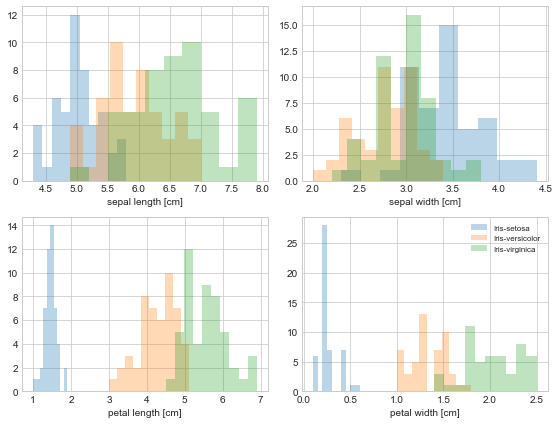

In [21]:
label_dict = {1: 'Iris-Setosa',
              2: 'Iris-Versicolor',
              3: 'Iris-Virgnica'}

feature_dict = {0: 'sepal length [cm]',
                1: 'sepal width [cm]',
                2: 'petal length [cm]',
                3: 'petal width [cm]'}

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(8, 6))
    for cnt in range(4):
        plt.subplot(2, 2, cnt+1)
        for lab in ('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'):
            plt.hist(X[y==lab, cnt],
                     label=lab,
                     bins=10,
                     alpha=0.3,)
        plt.xlabel(feature_dict[cnt])
    plt.legend(loc='upper right', fancybox=True, fontsize=8)

    plt.tight_layout()
    plt.show()
    
# Plot the distribution of each feature, with the legend representing the target value

In [22]:
X_std = StandardScaler().fit_transform(X)
# Standardize the data

In [24]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

# Use the dot product to create the covariance matrix (2 ways)

Covariance matrix 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]
NumPy covariance matrix: 
[[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


In [26]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# Generate the Eigenvectors and values using numpy

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.93035378 0.92740362 0.14834223 0.02074601]


In [27]:
cor_mat1 = np.corrcoef(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat1)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

#We get the same results if we perform this with the correlation matrix instead

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [28]:
cor_mat2 = np.corrcoef(X.T)

eig_vals, eig_vecs = np.linalg.eig(cor_mat2)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)
# This remains true even if we are working from the raw data

Eigenvectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]

Eigenvalues 
[2.91081808 0.92122093 0.14735328 0.02060771]


In [30]:
u,s,v = np.linalg.svd(X_std.T)
u
# Most PCA implementations just perform SVD, which can be seen in this example

array([[-0.52237162, -0.37231836,  0.72101681,  0.26199559],
       [ 0.26335492, -0.92555649, -0.24203288, -0.12413481],
       [-0.58125401, -0.02109478, -0.14089226, -0.80115427],
       [-0.56561105, -0.06541577, -0.6338014 ,  0.52354627]])

In [31]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')
# This confirms that the Eigenvectors all have the same unit length of one

Everything ok!


In [32]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
# Here we rank the Eigenvectors to determine which should be kept

Eigenvalues in descending order:
2.910818083752051
0.9212209307072239
0.14735327830509576
0.020607707235625654


In [33]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
# This cell calculates the explained variance and cumulative explained variance for each eigenvector

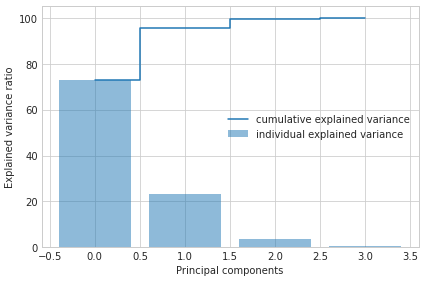

In [34]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(4), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
# Displaying the results from above

Matrix W:
 [[ 0.52237162 -0.37231836]
 [-0.26335492 -0.92555649]
 [ 0.58125401 -0.02109478]
 [ 0.56561105 -0.06541577]]


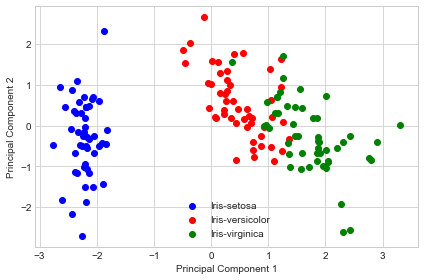

In [36]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(4,1),
                      eig_pairs[1][1].reshape(4,1)))

print('Matrix W:\n', matrix_w)

Y = X_std.dot(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
    
# Finally we can use the selected principal component pairs to transform our original data into a reduced dimension

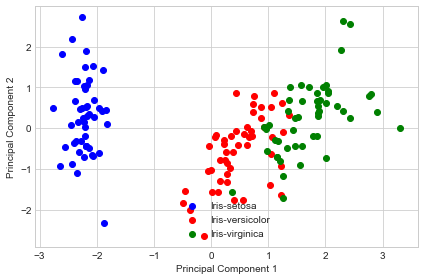

In [37]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X_std)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y_sklearn[y==lab, 0],
                    Y_sklearn[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()
    
# This can be done more simply with Sklearn and PCA

# Question 4

In [2]:
from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform
from sklearn.metrics import confusion_matrix

#import packages

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)
# Download the face dataset

Total dataset size:
n_samples: 1288
n_features: 1850
n_classes: 7


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# split into train and test

In [4]:
n_components = 150

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=True).fit(X_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

# Transform the faces dataset using PCA, retaining the first 150 faces

Extracting the top 150 eigenfaces from 966 faces
done in 0.214s
Projecting the input data on the eigenfaces orthonormal basis
done in 0.015s


In [5]:
print("Fitting the classifier to the training set")
t0 = time()
param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)
clf = clf.fit(X_train_pca, y_train)
print("done in %0.3fs" % (time() - t0))
print("Best estimator found by grid search:")
print(clf.best_estimator_)

# Using the principle components, train the Support Vector Classifier

Fitting the classifier to the training set
done in 5.056s
Best estimator found by grid search:
SVC(C=1102.7506195076294, class_weight='balanced', gamma=0.003457746735661742)


Predicting people's names on the test set
done in 0.056s
                   precision    recall  f1-score   support

     Ariel Sharon       0.60      0.46      0.52        13
     Colin Powell       0.78      0.87      0.82        60
  Donald Rumsfeld       0.83      0.70      0.76        27
    George W Bush       0.89      0.97      0.93       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       0.90      0.60      0.72        15
       Tony Blair       0.94      0.81      0.87        36

         accuracy                           0.86       322
        macro avg       0.84      0.74      0.78       322
     weighted avg       0.86      0.86      0.86       322



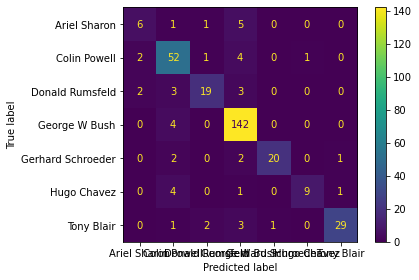

In [14]:
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("done in %0.3fs" % (time() - t0))

print(classification_report(y_test, y_pred, target_names=target_names))

ConfusionMatrixDisplay(
    confusion_matrix(y_test,y_pred), display_labels=target_names
).plot()

# Display our results using a confusion matrix


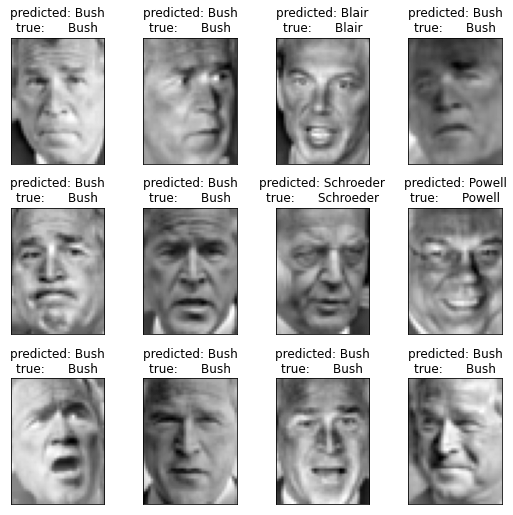

In [15]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(" ", 1)[-1]
    true_name = target_names[y_test[i]].rsplit(" ", 1)[-1]
    return "predicted: %s\ntrue:      %s" % (pred_name, true_name)


prediction_titles = [
    title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0])
]

plot_gallery(X_test, prediction_titles, h, w)

# Some examples of correct prediction made by the classifier

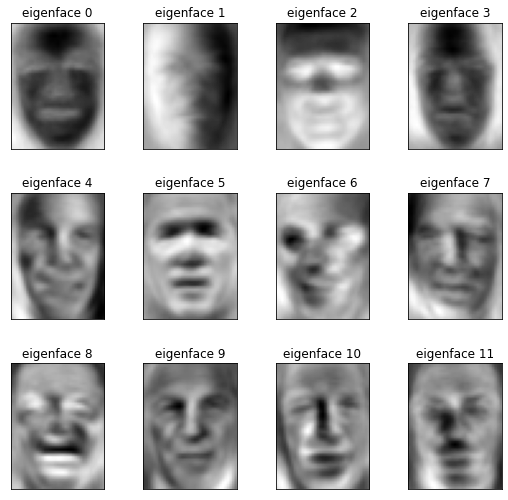

In [17]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()
#  These are the most significant eigenfaces

# Question 5

In [26]:
housing_df = pd.read_csv('housing.data', header = None, delim_whitespace=True)
housing_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [27]:
X_std = StandardScaler().fit_transform(housing_df)

cov_matrix = np.cov(X_std.T)
cov_matrix
# Normalize the data and generate the covariance matrix

array([[ 1.0019802 , -0.20086619,  0.40738853, -0.05600226,  0.42180532,
        -0.21968085,  0.35343273, -0.38042191,  0.62674377,  0.5839183 ,
         0.29051973, -0.38582644,  0.4565237 , -0.38907353],
       [-0.20086619,  1.0019802 , -0.53488527, -0.04278127, -0.51762669,
         0.31260839, -0.57066514,  0.66572388, -0.31256554, -0.31518622,
        -0.39245415,  0.17586788, -0.41381239,  0.3611591 ],
       [ 0.40738853, -0.53488527,  1.0019802 ,  0.06306266,  0.76516363,
        -0.39245145,  0.6460553 , -0.70942902,  0.59630775,  0.72218743,
         0.38400646, -0.35768342,  0.60499536, -0.48468303],
       [-0.05600226, -0.04278127,  0.06306266,  1.0019802 ,  0.09138341,
         0.09143192,  0.0866891 , -0.09937217, -0.00738283, -0.03565699,
        -0.1217558 ,  0.0488851 , -0.05403609,  0.17560723],
       [ 0.42180532, -0.51762669,  0.76516363,  0.09138341,  1.0019802 ,
        -0.30278658,  0.73291856, -0.77075334,  0.61265134,  0.66934602,
         0.1893068 , -0.38

## 5a

The variable that appear to covary are:

   **INDUS and NOX**: 0.765
    
   **NOX and DIS**: -0.771
    
   **RAD and TAX**: 0.912

[6.55895193 1.65279831 1.35157702 0.88829539 0.85258439 0.66131773
 0.53647102 0.40387475 0.06044612 0.13427506 0.27781262 0.25275696
 0.18334985 0.21321162]


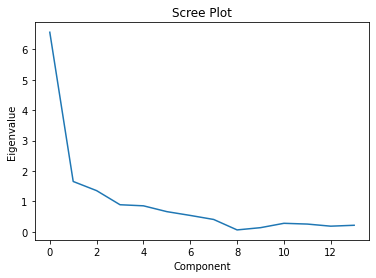

In [35]:
# 5b
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

print(eig_vals)

plt.plot(eig_vals)
plt.xlabel('Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.show()

In [36]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([ 46.75706842,  58.53943917,  68.17448149,  74.50690913,
        80.58476226,  85.29912493,  89.12348779,  92.00260624,
        93.98306041,  95.78489926,  97.30482961,  98.61188318,
        99.5690953 , 100.        ])

## 5c

### i

Using Technique 1 (retaining eiganvalues > 1) we retain the first 3 principal components. These three components explain 68.17% of the variance in the dataset

### ii

For Technique 2 (knee of the scree plot) we may only reatin the first principal component, which explains 46.78% of the variance

### iii

Technique 1 allows us to explain a larger percentage of the variance, but technique 2 explains a large percentage of the variance with fewer components

Matrix W:
 [[ 2.42284451e-01 -6.58731079e-02  3.95077419e-01]
 [-2.45435005e-01 -1.48002653e-01  3.94545713e-01]
 [ 3.31859746e-01  1.27075668e-01 -6.60819134e-02]
 [-5.02713285e-03  4.10668763e-01 -1.25305293e-01]
 [ 3.25193880e-01  2.54276363e-01 -4.64755487e-02]
 [-2.02816554e-01  4.34005810e-01  3.53406095e-01]
 [ 2.96976574e-01  2.60303205e-01 -2.00823078e-01]
 [-2.98169809e-01 -3.59149977e-01  1.57068710e-01]
 [ 3.03412754e-01  3.11495955e-02  4.18510334e-01]
 [ 3.24033052e-01  8.85140554e-03  3.43232194e-01]
 [ 2.07679535e-01 -3.14623061e-01  3.99092044e-04]
 [-1.96638358e-01  2.64810325e-02 -3.61375914e-01]
 [ 3.11397955e-01 -2.01245177e-01 -1.61060336e-01]
 [-2.66636396e-01  4.44924411e-01  1.63188735e-01]]


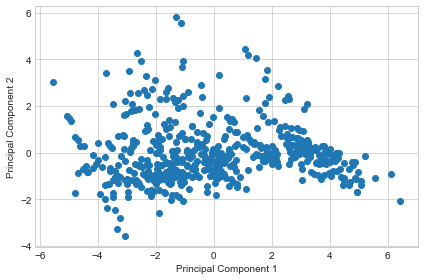

In [48]:
# 5d 
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

matrix_w = np.hstack((eig_pairs[0][1].reshape(14,1),
                      eig_pairs[1][1].reshape(14,1),
                     eig_pairs[2][1].reshape(14,1)))

print('Matrix W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Y_df = pd.DataFrame(Y)
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(Y_df[0],Y_df[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    plt.show()

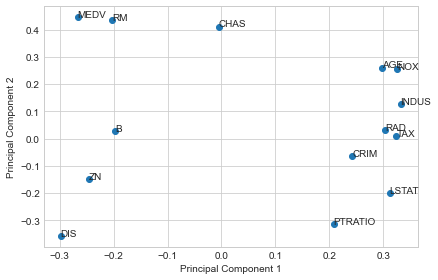

In [52]:
loadings = pd.DataFrame(matrix_w)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    plt.scatter(loadings[0],loadings[1])
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    
    plt.tight_layout()
    
    for i, txt in enumerate(housing_df.columns):
        plt.annotate(txt, (loadings[0][i], loadings[1][i]))
    plt.show()

The first principal component seems to show positive values for variables that negatively affect property values (Crime rates, Nitric oxides concentrations) and negative values for things that positively affect property values (Number of rooms, Distance from the city)

The second principal component is more difficult to determine, but may focus on the size and location of the house (CHAS, RM, DIS)

# Question 7

In [6]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans

import logging
from optparse import OptionParser
import sys
from time import time

import numpy as np
# Import the packages

In [22]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format="%(asctime)s %(levelname)s %(message)s")

# parse commandline arguments
op = OptionParser()
op.add_option(
    "--lsa",
    dest="n_components",
    type="int",
    help="Preprocess documents with latent semantic analysis.",
)
op.add_option(
    "--no-minibatch",
    action="store_false",
    dest="minibatch",
    default=True,
    help="Use ordinary k-means algorithm (in batch mode).",
)
op.add_option(
    "--no-idf",
    action="store_false",
    dest="use_idf",
    default=True,
    help="Disable Inverse Document Frequency feature weighting.",
)
op.add_option(
    "--use-hashing",
    action="store_true",
    default=False,
    help="Use a hashing feature vectorizer",
)
op.add_option(
    "--n-features",
    type=int,
    default=10000,
    help="Maximum number of features (dimensions) to extract from text.",
)
op.add_option(
    "--verbose",
    action="store_true",
    dest="verbose",
    default=False,
    help="Print progress reports inside k-means algorithm.",
)

print(__doc__)
op.print_help()
print()


def is_interactive():
    return not hasattr(sys.modules["__main__"], "__file__")


# work-around for Jupyter notebook and IPython console
argv = [] if is_interactive() else sys.argv[1:]
(opts, args) = op.parse_args(argv)
if len(args) > 0:
    op.error("this script takes no arguments.")
    sys.exit(1)

Automatically created module for IPython interactive environment
Usage: ipykernel_launcher.py [options]

Options:
  -h, --help            show this help message and exit
  --lsa=N_COMPONENTS    Preprocess documents with latent semantic analysis.
  --no-minibatch        Use ordinary k-means algorithm (in batch mode).
  --no-idf              Disable Inverse Document Frequency feature weighting.
  --use-hashing         Use a hashing feature vectorizer
  --n-features=N_FEATURES
                        Maximum number of features (dimensions) to extract
                        from text.
  --verbose             Print progress reports inside k-means algorithm.



In [23]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    subset="all", categories=categories, shuffle=True, random_state=42
)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
# Load the data

3387 documents
4 categories


In [24]:
labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm=None,
        )
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm="l2",
        )
else:
    vectorizer = TfidfVectorizer(
        max_df=0.5,
        max_features=opts.n_features,
        min_df=2,
        stop_words="english",
        use_idf=opts.use_idf,
    )
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
# TFIDF to map word frequency

Extracting features from the training dataset using a sparse vectorizer
done in 0.770986s
n_samples: 3387, n_features: 10000


In [25]:
opts.n_components = 100
if opts.n_components:
    print("Performing dimensionality reduction using LSA")
    t0 = time()
    # Vectorizer results are normalized, which makes KMeans behave as
    # spherical k-means for better results. Since LSA/SVD results are
    # not normalized, we have to redo the normalization.
    svd = TruncatedSVD(opts.n_components)
    normalizer = Normalizer(copy=False)
    lsa = make_pipeline(svd, normalizer)

    X = lsa.fit_transform(X)
    print("done in %fs" % (time() - t0))
    explained_variance = svd.explained_variance_ratio_.sum()
    print(
        "Explained variance of the SVD step: {}%".format(int(explained_variance * 100))
    )

    print(svd.singular_values_)
#  Reduce Dimensionality using LDA

Performing dimensionality reduction using LSA
done in 0.578807s
Explained variance of the SVD step: 24%
[8.35443147 5.54032664 4.9710448  4.80383487 4.57061534 4.37508473
 4.10356779 3.92667539 3.82803642 3.72735573 3.70105746 3.6474154
 3.49838353 3.47287666 3.37439221 3.36714272 3.33657889 3.2723347
 3.23817923 3.1897034  3.16435312 3.121467   3.10548143 3.08909387
 3.04920112 3.02994845 2.99907313 2.96360006 2.93185311 2.90910213
 2.88400309 2.85890702 2.85226943 2.84018373 2.81805925 2.80532366
 2.77002447 2.76594387 2.74874365 2.73060039 2.707673   2.69772107
 2.67373712 2.66558803 2.65475903 2.6337342  2.62171337 2.57210774
 2.5619388  2.55834284 2.53519575 2.52930855 2.50560874 2.50209334
 2.48795466 2.47481851 2.46137858 2.45918521 2.4406561  2.43937797
 2.41445107 2.41126629 2.40636582 2.4014872  2.37851036 2.37545161
 2.3615098  2.3509717  2.34818288 2.33179159 2.31833384 2.30799559
 2.30300419 2.29852212 2.29124222 2.27408791 2.26931519 2.26237204
 2.25254785 2.24159078 2.22

In [7]:
if opts.minibatch:
    km = MiniBatchKMeans(
        n_clusters=true_k,
        init="k-means++",
        n_init=1,
        init_size=1000,
        batch_size=1000,
        verbose=opts.verbose,
    )
else:
    km = KMeans(
        n_clusters=true_k,
        init="k-means++",
        max_iter=100,
        n_init=1,
        verbose=opts.verbose,
    )

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, km.labels_, sample_size=1000))

# Perform the k means clustering with k = 4

Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=4, n_init=1,
                verbose=False)
done in 0.145s

Homogeneity: 0.635
Completeness: 0.676
V-measure: 0.655
Adjusted Rand-Index: 0.586
Silhouette Coefficient: 0.032


C:\Users\thatb\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


In [26]:
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end="")
        for ind in order_centroids[i, :10]:
            print(" %s" % terms[ind], end="")
        print()

Top terms per cluster:
Cluster 0: god com people don jesus article think say christian just
Cluster 1: graphics 3d university com computer thanks posting host nntp help
Cluster 2: space nasa access henry com digex moon pat toronto shuttle
Cluster 3: image gif files file format images bit jpeg color 24


## 7a

The difference betweent the results of the LDA and the results of the k-means mainly lies in the number of clusters/components retained by the model. The LDA reduces the data into 100 components which are used to describe each documents. The k-means algorithm takes this reduced data to assign each document into 1 of 4 clusters.

In [27]:
categories = [
    "alt.atheism",
    "talk.religion.misc",
    "comp.graphics",
    "sci.space",
]

dataset = fetch_20newsgroups(
    subset="all", categories=categories, shuffle=True, random_state=42
)

print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))
# Load the data

3387 documents
4 categories


In [28]:
labels = dataset.target
true_k = np.unique(labels).shape[0]

print("Extracting features from the training dataset using a sparse vectorizer")
t0 = time()
if opts.use_hashing:
    if opts.use_idf:
        # Perform an IDF normalization on the output of HashingVectorizer
        hasher = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm=None,
        )
        vectorizer = make_pipeline(hasher, TfidfTransformer())
    else:
        vectorizer = HashingVectorizer(
            n_features=opts.n_features,
            stop_words="english",
            alternate_sign=False,
            norm="l2",
        )
else:
    vectorizer = TfidfVectorizer(
        max_df=0.5,
        max_features=opts.n_features,
        min_df=2,
        stop_words="english",
        use_idf=opts.use_idf,
    )
X = vectorizer.fit_transform(dataset.data)

print("done in %fs" % (time() - t0))
print("n_samples: %d, n_features: %d" % X.shape)
# TFIDF to map word frequency

Extracting features from the training dataset using a sparse vectorizer
done in 0.796128s
n_samples: 3387, n_features: 10000


In [29]:
if opts.minibatch:
    km = MiniBatchKMeans(
        n_clusters=true_k,
        init="k-means++",
        n_init=1,
        init_size=1000,
        batch_size=1000,
        verbose=opts.verbose,
    )
else:
    km = KMeans(
        n_clusters=true_k,
        init="k-means++",
        max_iter=100,
        n_init=1,
        verbose=opts.verbose,
    )

print("Clustering sparse data with %s" % km)
t0 = time()
km.fit(X)
print("done in %0.3fs" % (time() - t0))
print()

print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, km.labels_))
print("Adjusted Rand-Index: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, km.labels_, sample_size=1000))

# Perform the k means clustering with k = 4

Clustering sparse data with MiniBatchKMeans(batch_size=1000, init_size=1000, n_clusters=4, n_init=1,
                verbose=False)
done in 0.101s

Homogeneity: 0.322
Completeness: 0.389
V-measure: 0.353
Adjusted Rand-Index: 0.302
Silhouette Coefficient: 0.006


In [31]:
opts.n_components = False
if not opts.use_hashing:
    print("Top terms per cluster:")

    if opts.n_components:
        original_space_centroids = svd.inverse_transform(km.cluster_centers_)
        order_centroids = original_space_centroids.argsort()[:, ::-1]
    else:
        order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    terms = vectorizer.get_feature_names()
    for i in range(true_k):
        print("Cluster %d:" % i, end="")
        for ind in order_centroids[i, :10]:
            print(" %s" % terms[ind], end="")
        print()

Top terms per cluster:
Cluster 0: ac uk ___ __ baalke jpl kelvin _____ lilley mcc
Cluster 1: com keith sgi access livesey caltech digex morality objective pat
Cluster 2: space com graphics university nasa henry posting host nntp program
Cluster 3: god com sandvik jesus people bible christian religion kent don


## 7b

The example above performs the same k-means clustering, this time without LDA. We see that the scores for homogeneity and completeness scores drop. Aswell, if we look at the top terms per cluster, they seem to be less descriptive of the contents of the cluster. This example shows the effectiveness of LDA

# Question 8

In [16]:
iris_df = datasets.load_iris()
X = iris_df.data
y = iris_df.target

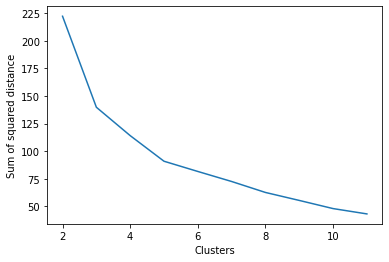

In [29]:
X_std = StandardScaler().fit_transform(X)
ssd = []
n_clust = []
for k in range(2,12):
    kmeans = KMeans(n_clusters = k, max_iter=100).fit(X_std)
    ssd.append(kmeans.inertia_)
    n_clust.append(k)
    
plt.plot(n_clust,ssd)
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')
plt.show()

# From the scree plot, the elbow appears to be around 3-5 clusters. We will use 3 clusters

In [38]:
from sklearn.metrics.cluster import v_measure_score

kmeans = KMeans(n_clusters = 3, max_iter=100).fit(X_std)
print(kmeans.labels_)
print(y)
print(v_measure_score(y,kmeans.labels_))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.6525582020084983


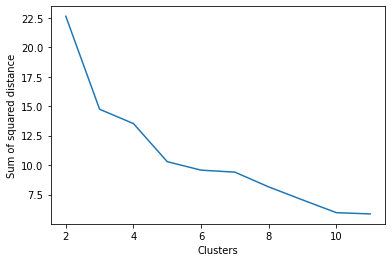

In [35]:
# 8b
from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle = True)

X_std = StandardScaler().fit_transform(X)
ssd = []
n_clust = []
for k in range(2,12):
    n_clust.append(k)
    k_ssd = []
    for train_index, test_index in kf.split(X_std):
        X_train, X_test = X_std[train_index], X_std[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        kmeans = KMeans(n_clusters = k, max_iter=100)
        kmeans.fit(X_train)
        test_k = kmeans.transform(X_test)
        
        distances_sq = [min(clust)**2 for clust in test_k]
        
        sum_dist = np.sum(distances_sq)
        k_ssd.append(sum_dist)
        
    ssd.append(np.mean(k_ssd))
    
plt.plot(n_clust,ssd)
plt.xlabel('Clusters')
plt.ylabel('Sum of squared distance')
plt.show()
# K fold cross validation sugguests that 5 clusters may be best, potentially 10

In [40]:
kmeans = KMeans(n_clusters = 5, max_iter=100).fit(X_std)
v_measure_score(y,kmeans.labels_)

0.6148317359556221